# Import all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

In [3]:
df = pd.read_csv('./HeartAttack.csv',na_values='?' )

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


# drop the unnecessary columns

In [5]:
drop_cols = [ 'slope', 'ca', 'thal' ]
df.drop(columns=drop_cols , inplace=True)

# Rename the columns

In [6]:
new_names = {
    'cp':'chest_pain',
    'trestbps':'resting_blood_pressure',
    'chol': 'cholestoral',
    'fbs' : 'fasting_blood_sugar',
    'thalach' : 'maximum_heart_rate',
    'exang': 'exercise_induced_angina',
    'num       ':'target'
}

df.rename( columns=new_names,inplace=True )

In [7]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,restecg,maximum_heart_rate,exercise_induced_angina,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      294 non-null    int64  
 1   sex                      294 non-null    int64  
 2   chest_pain               294 non-null    int64  
 3   resting_blood_pressure   293 non-null    float64
 4   cholestoral              271 non-null    float64
 5   fasting_blood_sugar      286 non-null    float64
 6   restecg                  293 non-null    float64
 7   maximum_heart_rate       293 non-null    float64
 8   exercise_induced_angina  293 non-null    float64
 9   oldpeak                  294 non-null    float64
 10  target                   294 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 25.4 KB


In [9]:
df.shape

(294, 11)

In [10]:
df.isnull().sum()

age                         0
sex                         0
chest_pain                  0
resting_blood_pressure      1
cholestoral                23
fasting_blood_sugar         8
restecg                     1
maximum_heart_rate          1
exercise_induced_angina     1
oldpeak                     0
target                      0
dtype: int64

# Drop all the null values

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
cholestoral                0
fasting_blood_sugar        0
restecg                    0
maximum_heart_rate         0
exercise_induced_angina    0
oldpeak                    0
target                     0
dtype: int64

In [13]:
df.shape

(261, 11)

In [14]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,restecg,maximum_heart_rate,exercise_induced_angina,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0


In [15]:
df['chest_pain'].unique()

array([2, 1, 3, 4], dtype=int64)

In [16]:
df['restecg'] = df['restecg'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      261 non-null    int64  
 1   sex                      261 non-null    int64  
 2   chest_pain               261 non-null    int64  
 3   resting_blood_pressure   261 non-null    float64
 4   cholestoral              261 non-null    float64
 5   fasting_blood_sugar      261 non-null    float64
 6   restecg                  261 non-null    int32  
 7   maximum_heart_rate       261 non-null    float64
 8   exercise_induced_angina  261 non-null    float64
 9   oldpeak                  261 non-null    float64
 10  target                   261 non-null    int64  
dtypes: float64(6), int32(1), int64(4)
memory usage: 23.4 KB


In [18]:
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,restecg,maximum_heart_rate,exercise_induced_angina,oldpeak,target
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,47.770115,0.735632,3.003831,132.639847,248.823755,0.072797,0.226054,139.226054,0.318008,0.612261,0.375479
std,7.842244,0.441843,0.970718,17.709857,65.667985,0.260302,0.470935,23.757401,0.466597,0.931914,0.485177
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,242.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,280.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


# Check duplicates

In [19]:
df.duplicated().sum()

0

# Outliers

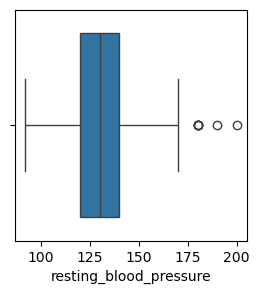

In [20]:
plt.figure(figsize=(3,3))
sns.boxplot(x=df['resting_blood_pressure'])  
plt.show()

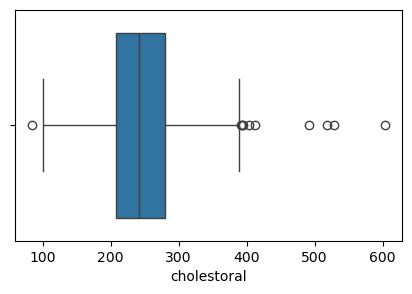

In [21]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['cholestoral'])  
plt.show()

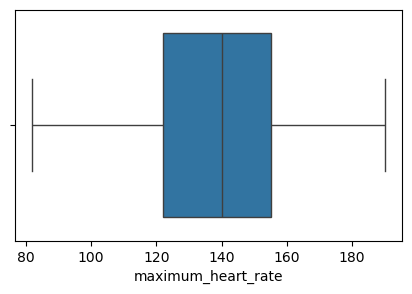

In [22]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['maximum_heart_rate'])  
plt.show()

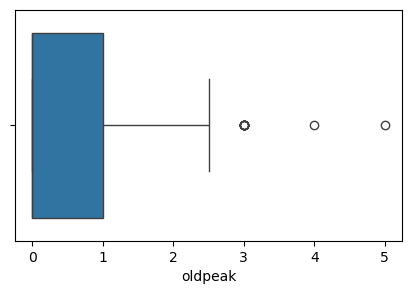

In [23]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['oldpeak'])  
plt.show()

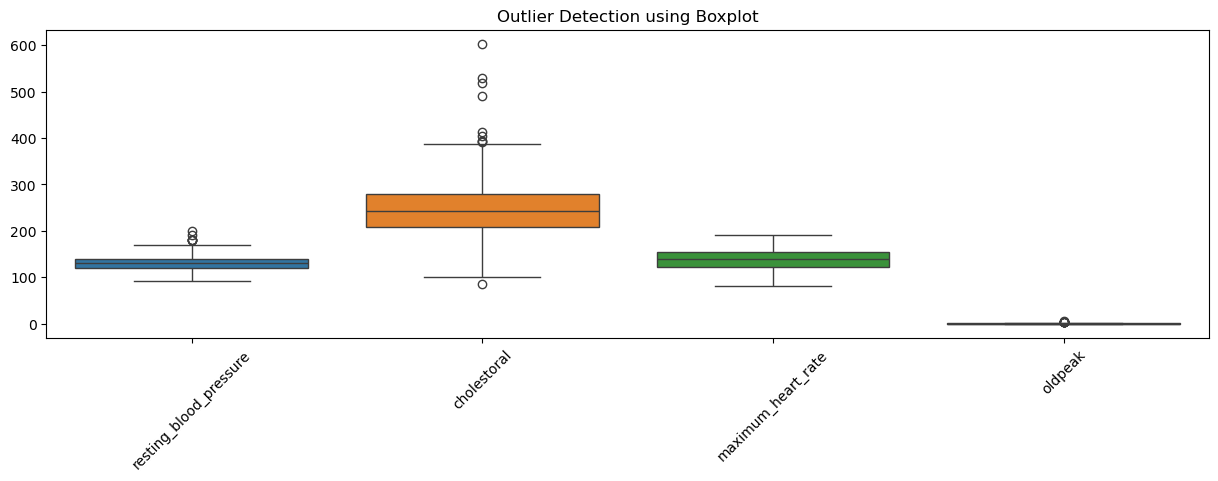

In [24]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df[[ 'resting_blood_pressure', 'cholestoral', 'maximum_heart_rate', 'oldpeak']])
plt.xticks(rotation=45)
plt.title("Outlier Detection using Boxplot")
plt.show()

# Plots

# Define the bar graph

In [25]:
def plotBarGraph( X, Y, XLabel, YLabel, label, title, color='blue' ):
    
    plt.figure(figsize=(6,5))
    
    plt.bar( x=X,height=Y,color=color,label=label )
    
    plt.title(title)
    
    plt.xlabel(XLabel)
    
    plt.ylabel(YLabel)
    
    plt.xticks(rotation=45)
    
    plt.legend()
    
    plt.show()

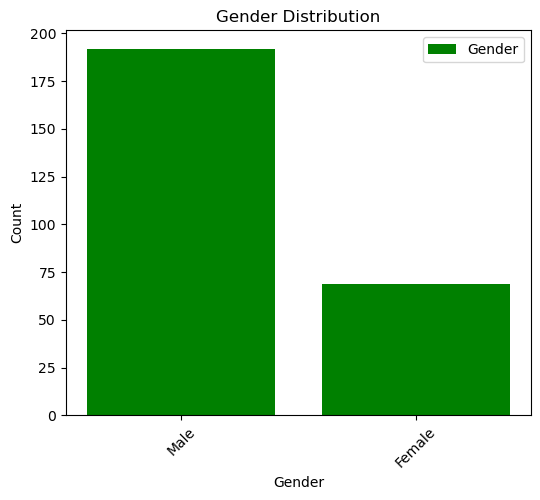

In [26]:
gender = df['sex'].value_counts()

plotBarGraph(
    X=['Male','Female'], Y=gender.values,
    XLabel="Gender",YLabel="Count",
    label="Gender",title="Gender Distribution",color='green'
)

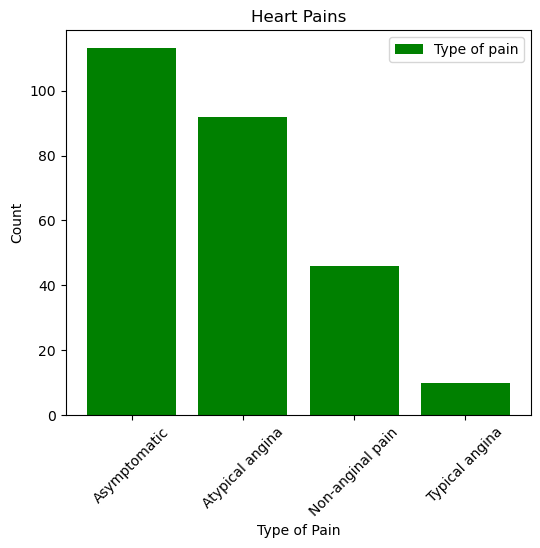

In [27]:
chest_pain = df['chest_pain'].value_counts()

cp_types = [ 'Asymptomatic' , 'Atypical angina', 'Non-anginal pain' ,'Typical angina'    ]

plotBarGraph(
    X=cp_types, Y=chest_pain.values,
    XLabel="Type of Pain",YLabel="Count",
    label="Type of pain",title="Heart Pains",color='green'
)

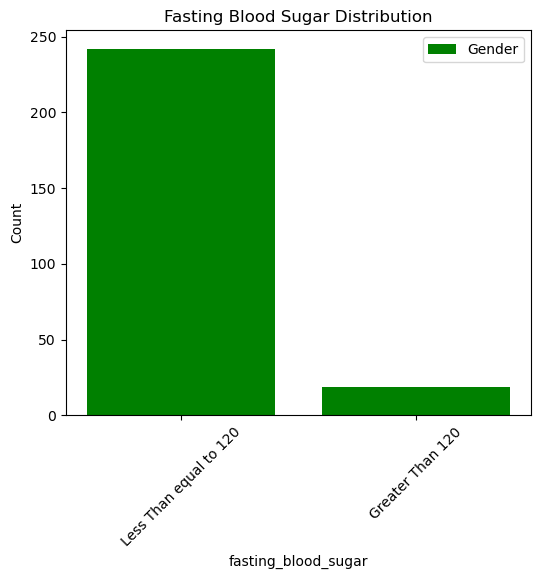

In [28]:
fasting_blood_sugar = df['fasting_blood_sugar'].value_counts()

plotBarGraph(
    X=['Less Than equal to 120' , 'Greater Than 120'], Y=fasting_blood_sugar.values,
    XLabel="fasting_blood_sugar",YLabel="Count",
    label="Gender",title="Fasting Blood Sugar Distribution",color='green'
)

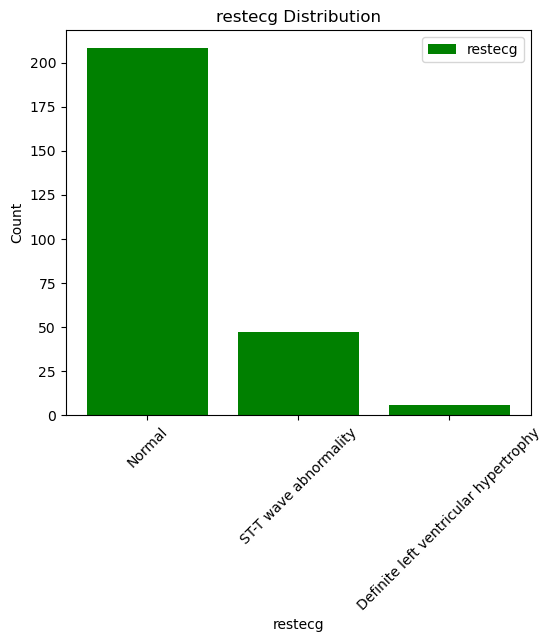

In [29]:
restecg = df['restecg'].value_counts()

plotBarGraph(
    X=[ 'Normal','ST-T wave abnormality','Definite left ventricular hypertrophy' ], Y=restecg.values,
    XLabel="restecg",YLabel="Count",
    label="restecg",title="restecg Distribution",color='green'
)

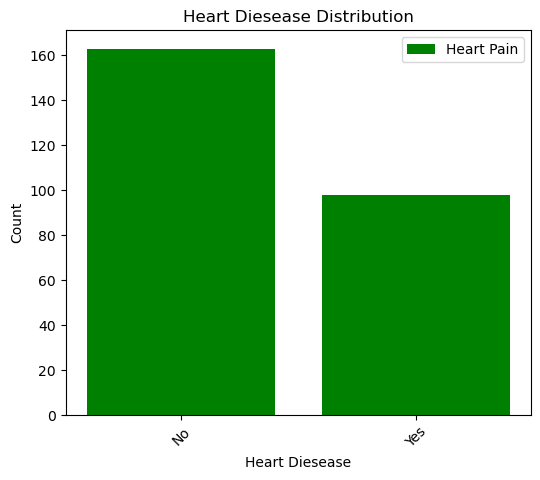

In [30]:
target = df['target'].value_counts()

plotBarGraph(
    X=[ 'No', 'Yes'], Y=target.values,
    XLabel="Heart Diesease",YLabel="Count",
    label="Heart Pain",title="Heart Diesease Distribution",color='green'
)

# Gender wise heart diesase distribution

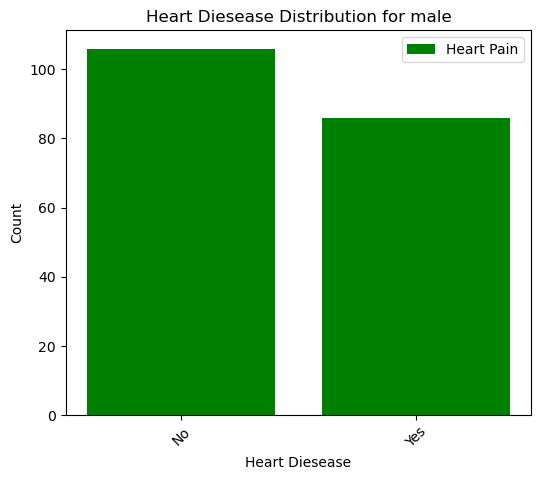

In [31]:
male = df[ df['sex'] == 1 ]['target'].value_counts()


plotBarGraph(
    X=[ 'No', 'Yes'], Y=male.values,
    XLabel="Heart Diesease",YLabel="Count",
    label="Heart Pain",title="Heart Diesease Distribution for male",color='green'
)

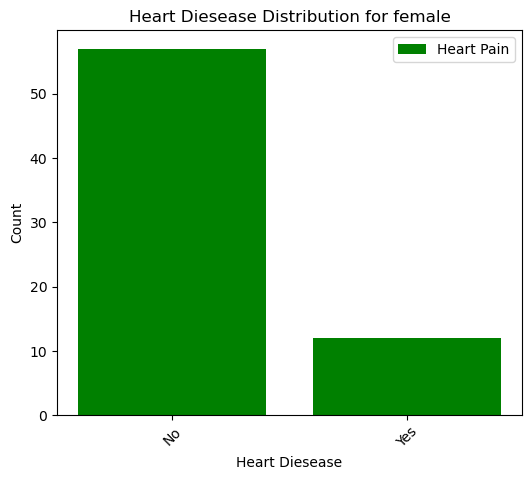

In [32]:
femlae = df[ df['sex'] == 0 ]['target'].value_counts()

plotBarGraph(
    X=[ 'No', 'Yes'], Y=femlae.values,
    XLabel="Heart Diesease",YLabel="Count",
    label="Heart Pain",title="Heart Diesease Distribution for female",color='green'
)

# Co-relation

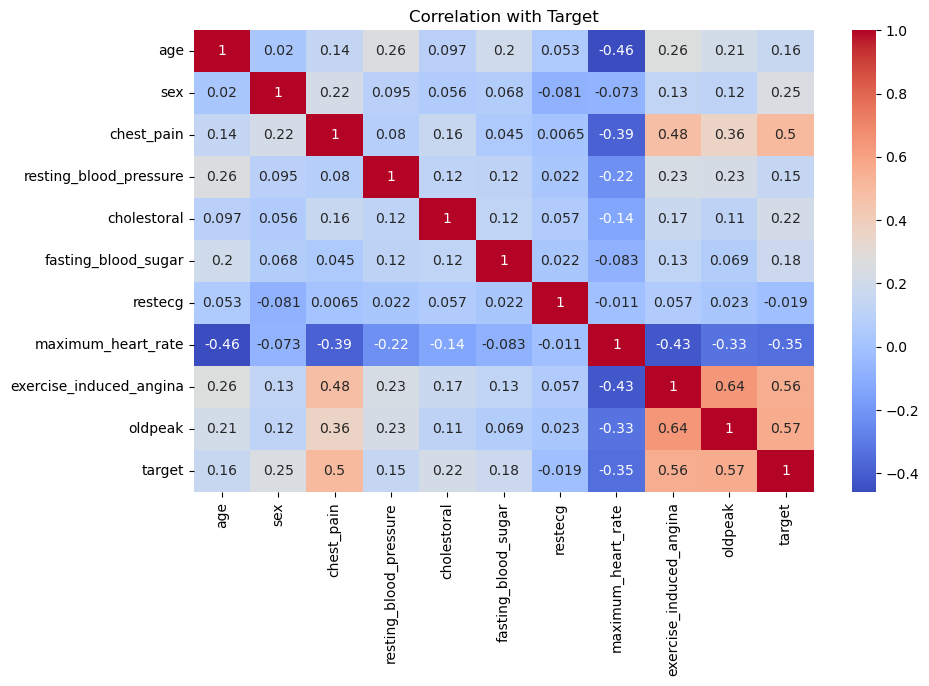

In [33]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation with Target")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

# Split the dataset into train test

In [35]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error

In [37]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}


In [38]:
test_accuracy = []
train_accuracy=[]
errors = []

type_of_models = [ "Logistic Regression" , "Random Forest" ,"Naive Bayes" ]

In [39]:
for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    
    train_predictions = model.predict(X_train)
    
    test_accuracy.append( accuracy_score(y_test, test_predictions) )
    
    train_accuracy.append( accuracy_score(y_train, train_predictions) )
    errors.append( mean_squared_error(y_test,test_predictions) )
    
    # print(f"\n Model: {name}")
    # print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    # print("Classification Report:\n", classification_report(y_test, predictions))


# Training Accuracy of different Models

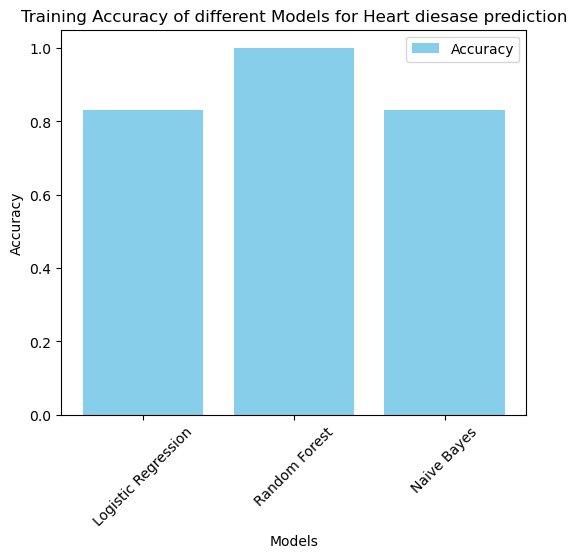

In [40]:
plotBarGraph(
    X=type_of_models, Y=train_accuracy,
    XLabel="Models",YLabel="Accuracy",
    label="Accuracy",title="Training Accuracy of different Models for Heart diesase prediction",color='skyblue'
)

# Testing Accuracy of different Models

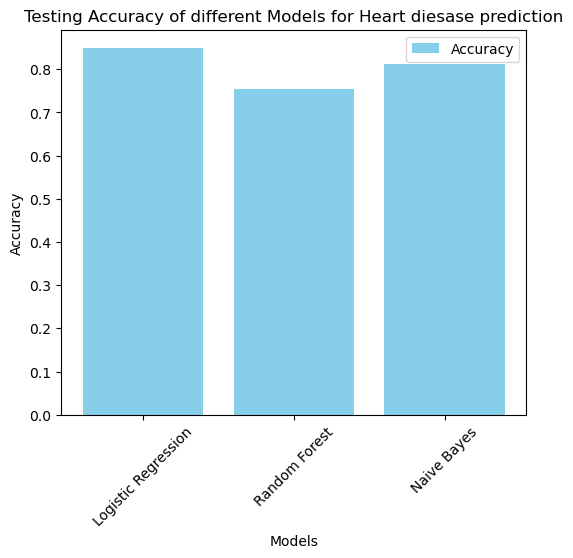

In [41]:
plotBarGraph(
    X=type_of_models, Y=test_accuracy,
    XLabel="Models",YLabel="Accuracy",
    label="Accuracy",title="Testing Accuracy of different Models for Heart diesase prediction",color='skyblue'
)

# Errors of Different Models

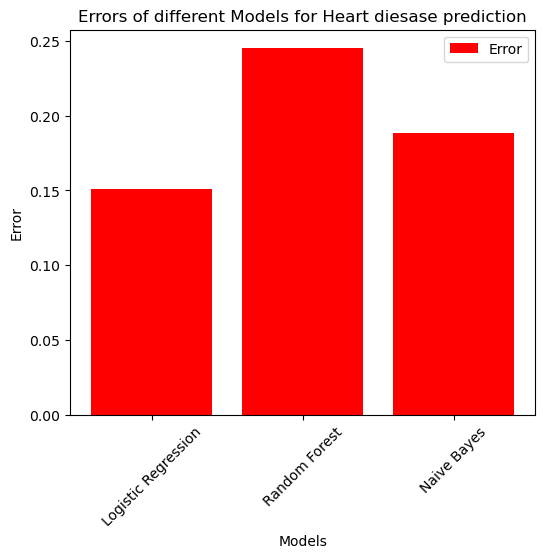

In [42]:
plotBarGraph(
    X=type_of_models, Y=errors,
    XLabel="Models",YLabel="Error",
    label="Error",title="Errors of different Models for Heart diesase prediction",color='red'
)